In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load & filter ---
df_all = pd.read_csv("yearly_full_release_long_format.csv")


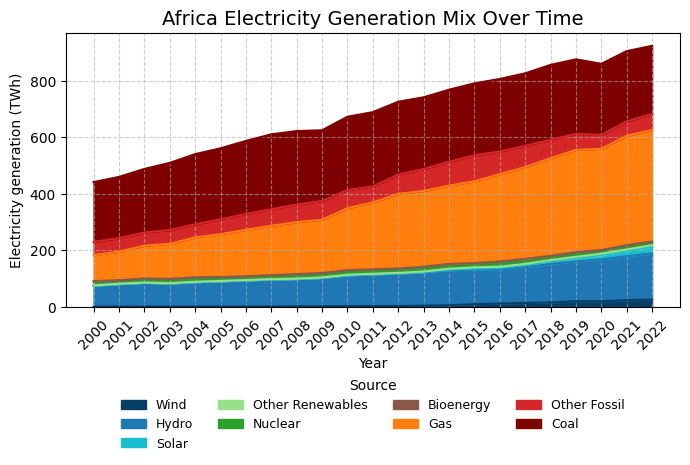

In [2]:

df_Africa = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh") &
    (df_all["Year"] <= 2022)
].copy()

# --- Aggregate & pivot ---
mix_Africa = df_Africa.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_Africa = (
    mix_Africa
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_Africa.columns]
mix_pivot_Africa = mix_pivot_Africa[energy_order]

# --- Color map ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_Africa.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_Africa.plot(
    kind="area",
    stacked=True,
    ax=ax,
    color=colors
)

ax.set_title("Africa Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_Africa.index)
ax.set_xticklabels(mix_pivot_Africa.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order automatically
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


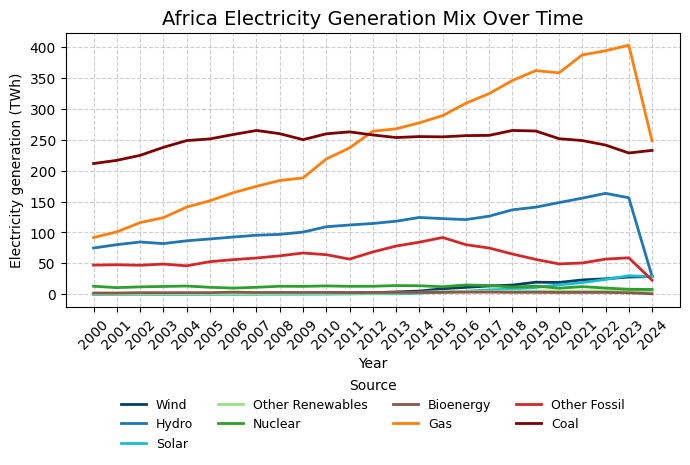

In [3]:

df_Africa = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh")
].copy()

# --- Aggregate & pivot ---
mix_Africa = df_Africa.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_Africa = (
    mix_Africa
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_Africa.columns]
mix_pivot_Africa = mix_pivot_Africa[energy_order]

# --- Color map ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_Africa.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_Africa.plot(
    kind="line",
    stacked=False,
    linewidth=2,
    ax=ax,
    color=colors
)

ax.set_title("Africa Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_Africa.index)
ax.set_xticklabels(mix_pivot_Africa.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order automatically
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

In [4]:

df_Africa_quota = mix_Africa.copy()

df_Africa_quota["Quota"] = (
    df_Africa_quota["Value"] /
    df_Africa_quota.groupby("Year")["Value"].transform("sum")
)


df_Africa_quota.head()


,Year,Variable,Value,Quota
0,2000,Bioenergy,2.04,0.004625
1,2000,Coal,211.52,0.479550
2,2000,Gas,91.85,0.208239
3,2000,Hydro,74.85,0.169697
4,2000,Nuclear,13.01,0.029496


In [5]:

df_Africa_quota.groupby("Year")["Quota"].sum()


Year
2000    1.0
2001    1.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
2023    1.0
2024    1.0
Name: Quota, dtype: float64

In [6]:

mix_Africa_aggregate = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Aggregate fuel") &
    (df_all["Unit"] == "TWh")
].copy()

mix_Africa_aggregate.head()
df_Africa_quota = mix_Africa_aggregate.copy()

df_Africa_quota["Quota"] = (
    df_Africa_quota["Value"] /
    df_Africa_quota.groupby("Year")["Value"].transform("sum")
)


In [7]:


df_Africa_quota.head()


,Area,ISO 3 code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change,Quota
4841,Algeria,DZA,2000,Country or economy,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Clean,TWh,0.05,NaN,NaN,0.000068
4842,Algeria,DZA,2000,Country or economy,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Fossil,TWh,25.35,NaN,NaN,0.034484
4843,Algeria,DZA,2000,Country or economy,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Gas and Other Fossil,TWh,25.35,NaN,NaN,0.034484
4844,Algeria,DZA,2000,Country or economy,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",TWh,0.05,NaN,NaN,0.000068
4845,Algeria,DZA,2000,Country or economy,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Renewables,TWh,0.05,NaN,NaN,0.000068


In [8]:


df_Africa_quota.groupby("Year")["Quota"].sum()

df_production_mix_Africa_2000_2025 = (
    df_Africa_quota
    .groupby("Variable", as_index=False)["Value"]
    .sum()
)
df_production_mix_Africa_2000_2025.head(9)
df_production_mix_Africa_2000_2025["Quota"] = (
    df_production_mix_Africa_2000_2025["Value"] /
    df_production_mix_Africa_2000_2025["Value"].sum()
)
df_production_mix_Africa_2000_2025["Quota"].sum()
df_plot = df_production_mix_Africa_2000_2025.sort_values("Quota", ascending=False)

df_Africa_quota_2000_2010 = df_Africa_quota[df_Africa_quota["Year"] <= 2010]
df_Africa_quota_2010_2024 = df_Africa_quota[df_Africa_quota["Year"] > 2010]
df_production_mix_Africa_2000_2010 = (
    df_Africa_quota_2000_2010
    .groupby("Variable", as_index=False)["Value"]
    .sum()
)


df_production_mix_Africa_2010_2025 = (
    df_Africa_quota_2010_2024
    .groupby("Variable", as_index=False)["Value"]
    .sum()
)

df_production_mix_Africa_2000_2010["Quota"] = (
    df_production_mix_Africa_2000_2010["Value"] /
    df_production_mix_Africa_2000_2010["Value"].sum()
)

df_production_mix_Africa_2010_2025["Quota"] = (
    df_production_mix_Africa_2010_2025["Value"] /
    df_production_mix_Africa_2010_2025["Value"].sum()
)


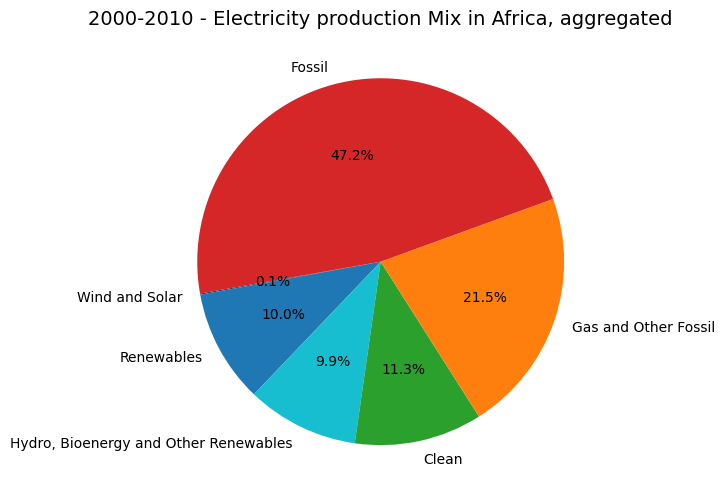

In [9]:
df_source = df_production_mix_Africa_2000_2010

# Ordine (più clean → più fossile) per la versione "aggregated"
energy_order = [
    "Wind and Solar",
    "Renewables",
    "Hydro, Bioenergy and Other Renewables",
    "Clean",
    "Gas and Other Fossil",
    "Fossil"
]

# Color coding coerente (blu/verde = low/zero emission → arancio/rosso = fossili)
energy_color_map = {
    "Wind and Solar": "#073e66",                         # blu scuro (emission free)
    "Renewables": "#1f77b4",                             # blu (rinnovabili)
    "Hydro, Bioenergy and Other Renewables": "#17becf",  # azzurro/ciano (rinnovabili mix)
    "Clean": "#2ca02c",                                  # verde (low/very low emission)
    "Gas and Other Fossil": "#ff7f0e",                   # arancione (medie emissioni)
    "Fossil": "#d62728"                                  # rosso (alte emissioni)
}

# Prepara dataframe ordinato
df_plot = df_source.copy()

energy_order_plot = [e for e in energy_order if e in df_plot["Variable"].values]

df_plot["Variable"] = pd.Categorical(
    df_plot["Variable"],
    categories=energy_order_plot,
    ordered=True
)

df_plot = df_plot.sort_values("Variable")

colors = [energy_color_map[v] for v in df_plot["Variable"]]

# Plot
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(
    df_plot["Quota"],
    labels=df_plot["Variable"],      # <-- labels al posto della legenda
    colors=colors,
    autopct="%1.1f%%",
    startangle=190
)

ax.set_title("2000-2010 - Electricity production Mix in Africa, aggregated", fontsize=14)

plt.tight_layout()
plt.show()


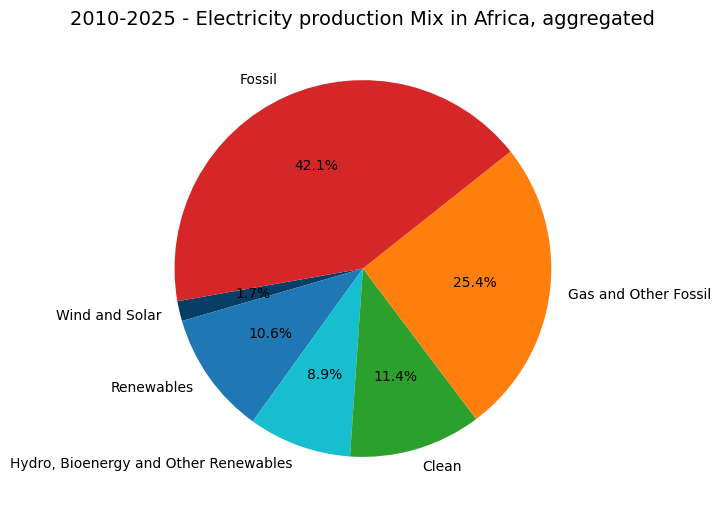

In [10]:

df_source = df_production_mix_Africa_2010_2025

# Ordine (più clean → più fossile) per la versione "aggregated"
energy_order = [
    "Wind and Solar",
    "Renewables",
    "Hydro, Bioenergy and Other Renewables",
    "Clean",
    "Gas and Other Fossil",
    "Fossil"
]

# Color coding coerente (blu/verde = low/zero emission → arancio/rosso = fossili)
energy_color_map = {
    "Wind and Solar": "#073e66",                         # blu scuro (emission free)
    "Renewables": "#1f77b4",                             # blu (rinnovabili)
    "Hydro, Bioenergy and Other Renewables": "#17becf",  # azzurro/ciano (rinnovabili mix)
    "Clean": "#2ca02c",                                  # verde (low/very low emission)
    "Gas and Other Fossil": "#ff7f0e",                   # arancione (medie emissioni)
    "Fossil": "#d62728"                                  # rosso (alte emissioni)
}

# Prepara dataframe ordinato
df_plot = df_source.copy()

energy_order_plot = [e for e in energy_order if e in df_plot["Variable"].values]

df_plot["Variable"] = pd.Categorical(
    df_plot["Variable"],
    categories=energy_order_plot,
    ordered=True
)

df_plot = df_plot.sort_values("Variable")

colors = [energy_color_map[v] for v in df_plot["Variable"]]

# Plot
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(
    df_plot["Quota"],
    labels=df_plot["Variable"],      # <-- labels al posto della legenda
    colors=colors,
    autopct="%1.1f%%",
    startangle=190
)

ax.set_title("2010-2025 - Electricity production Mix in Africa, aggregated", fontsize=14)

plt.tight_layout()
plt.show()


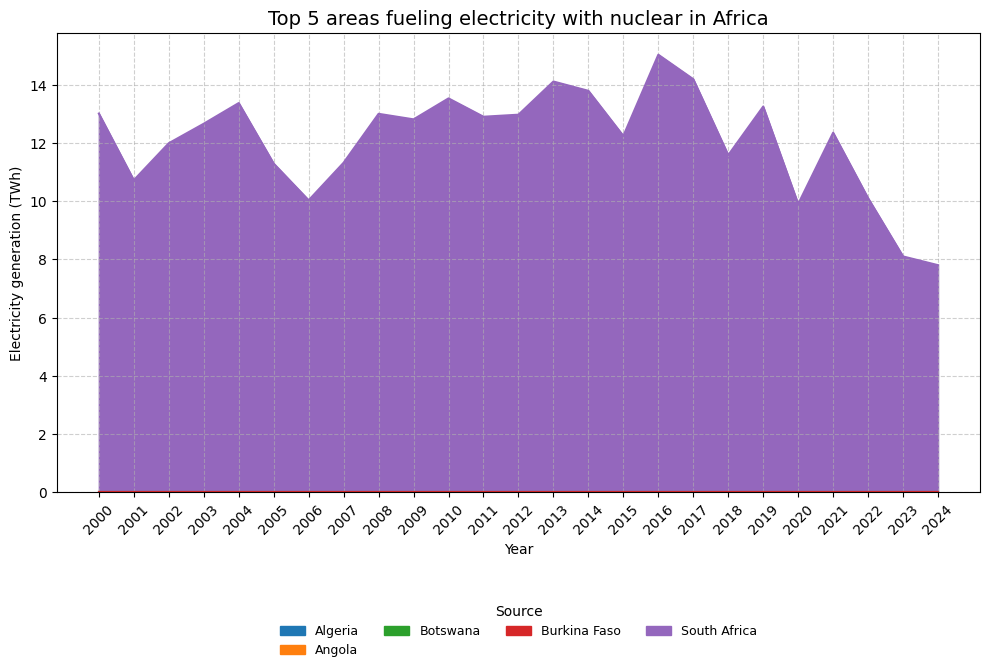

In [11]:

df_nuclear_Africa = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Nuclear") &
    (df_all["Unit"] == "TWh")
].copy()
df_nuclear_Africa.head()
nuclear_comparison_Africa = df_nuclear_Africa.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_nuclear = (
    nuclear_comparison_Africa
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

nuclear_comparison_top5 = nuclear_comparison_Africa[
    nuclear_comparison_Africa["Area"].isin(top_5_areas_nuclear)]

mix_pivot_nuclear_Africa = (
    nuclear_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_nuclear_Africa.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with nuclear in Africa", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_nuclear_Africa.index)
ax.set_xticklabels(mix_pivot_nuclear_Africa.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


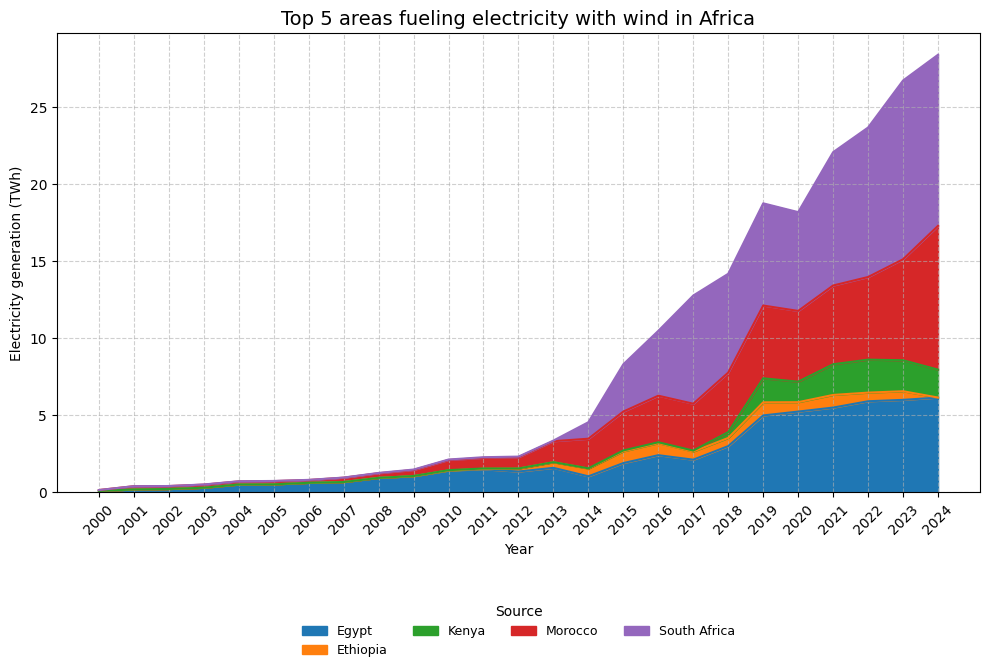

In [12]:

df_wind_Africa = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Wind") &
    (df_all["Unit"] == "TWh")
].copy()

wind_comparison_Africa = df_wind_Africa.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_wind = (
    wind_comparison_Africa
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

wind_comparison_top5 = wind_comparison_Africa[
    wind_comparison_Africa["Area"].isin(top_5_areas_wind)]
mix_pivot_wind_Africa = (
    wind_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_wind_Africa.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with wind in Africa", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_wind_Africa.index)
ax.set_xticklabels(mix_pivot_wind_Africa.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


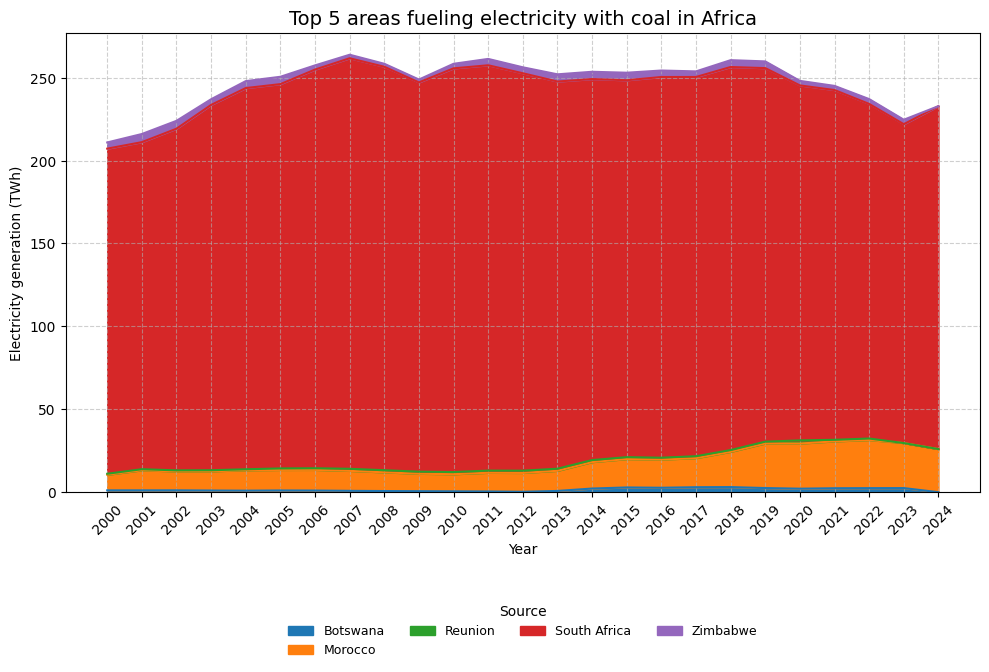

In [13]:

df_coal_Africa = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Coal") &
    (df_all["Unit"] == "TWh")
].copy()

coal_comparison_Africa = df_coal_Africa.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_coals = (
    coal_comparison_Africa
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

coal_comparison_top5 = coal_comparison_Africa[
    coal_comparison_Africa["Area"].isin(top_5_areas_coals)]
mix_pivot_coal_Africa = (
    coal_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_coal_Africa.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with coal in Africa", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_coal_Africa.index)
ax.set_xticklabels(mix_pivot_coal_Africa
                   .index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


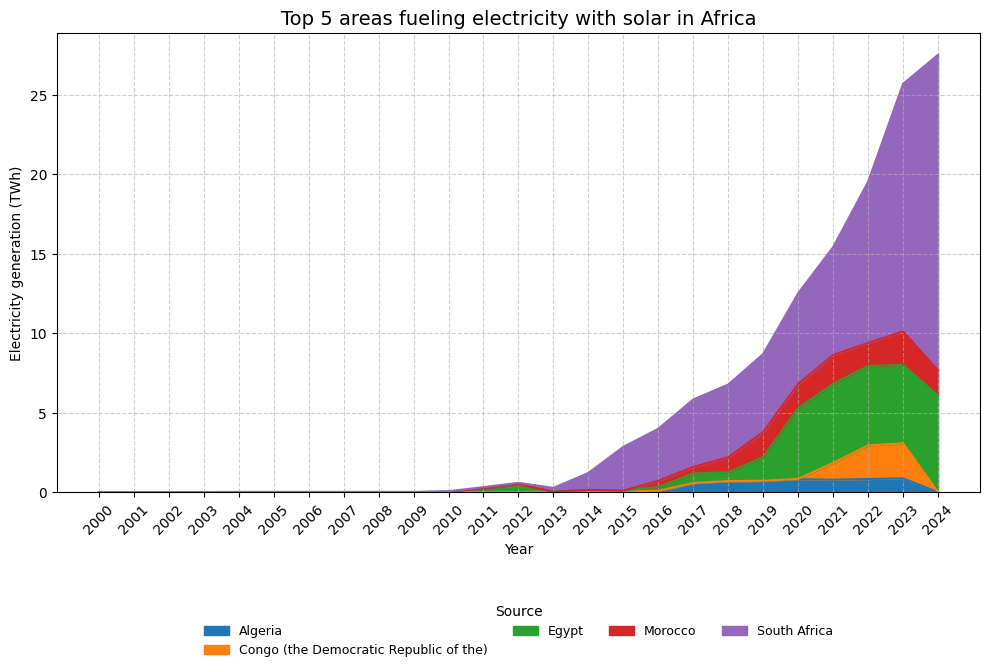

In [14]:
df_coal_Africa = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Solar") &
    (df_all["Unit"] == "TWh")
].copy()

solar_comparison_Africa = df_coal_Africa.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_solar = (
    solar_comparison_Africa
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

solar_comparison_top5 = solar_comparison_Africa[
    solar_comparison_Africa["Area"].isin(top_5_areas_solar)]
mix_pivot_solar_Africa = (
    solar_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_solar_Africa.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with solar in Africa", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_solar_Africa.index)
ax.set_xticklabels(mix_pivot_solar_Africa
                   .index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

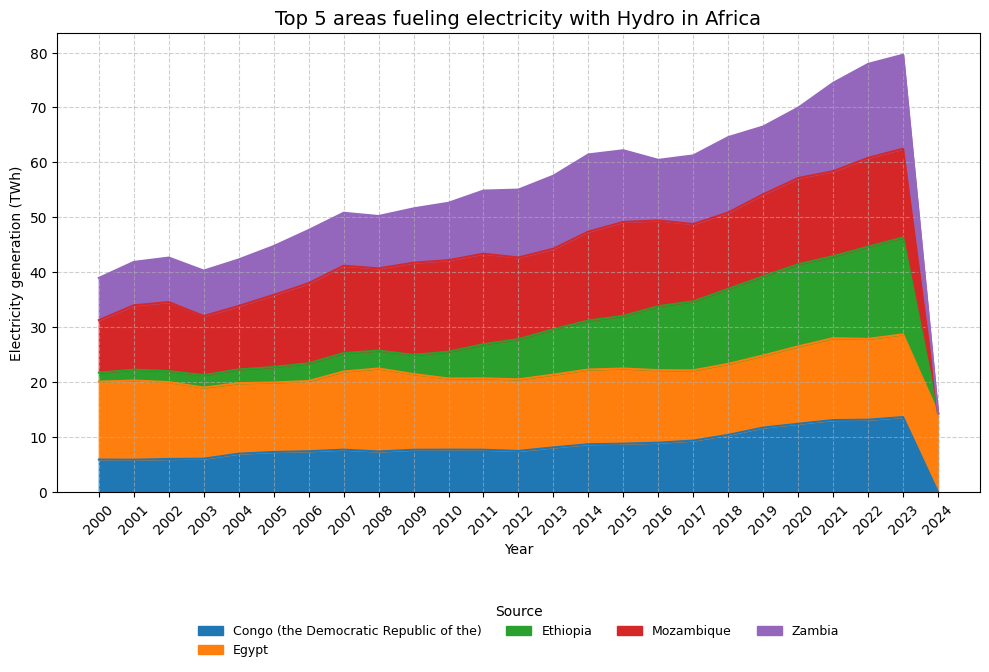

In [15]:
df_Hydro_Africa = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Hydro") &
    (df_all["Unit"] == "TWh")
].copy()

Hydro_comparison_Africa = df_Hydro_Africa.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_Hydro = (
    Hydro_comparison_Africa
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

Hydro_comparison_top5 = Hydro_comparison_Africa[
    Hydro_comparison_Africa["Area"].isin(top_5_areas_Hydro)]
mix_pivot_Hydro_Africa = (
    Hydro_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_Hydro_Africa.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with Hydro in Africa", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_Hydro_Africa.index)
ax.set_xticklabels(mix_pivot_Hydro_Africa
                   .index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

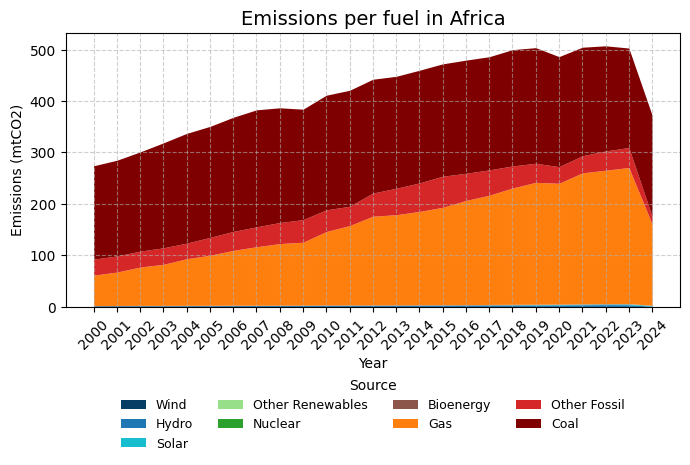

In [16]:
# --- Filter ---
df_Africa_emissions = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Power sector emissions") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "mtCO2")
].copy()

# --- Aggregate & pivot ---
mix_Africa_emissions = df_Africa_emissions.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_Africa_emissions = (
    mix_Africa_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_Africa_emissions.columns]
mix_pivot_Africa_emissions = mix_pivot_Africa_emissions[energy_order]

# --- Color map (updated) ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_Africa_emissions.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_Africa_emissions.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Emissions per fuel in Africa", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (mtCO2)")

ax.set_xticks(mix_pivot_Africa_emissions.index)
ax.set_xticklabels(mix_pivot_Africa_emissions.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


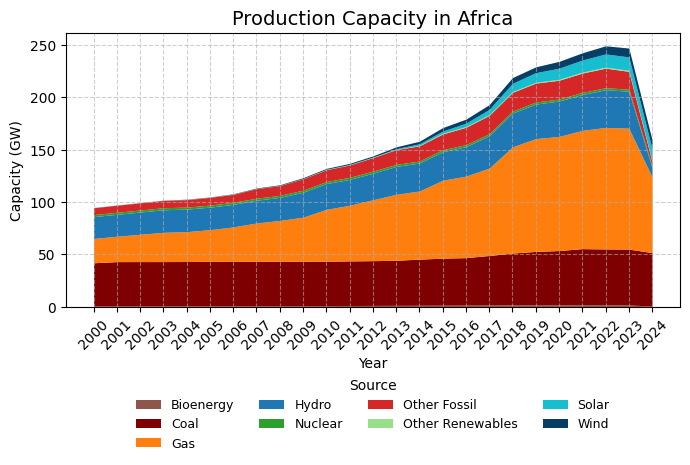

In [17]:
# --- Filter ---
df_Africa_capacity = df_all[
    (df_all["Continent"] == "Africa") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Capacity") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "GW")
].copy()

# --- Aggregate & pivot ---
mix_Africa_capacity = df_Africa_capacity.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_Africa_capacity = (
    mix_Africa_capacity
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_Africa_emissions.columns]
mix_pivot_Africa_emissions = mix_pivot_Africa_emissions[energy_order]

# --- Color map (updated) ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_Africa_capacity.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_Africa_capacity.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Production Capacity in Africa", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Capacity (GW)")

ax.set_xticks(mix_pivot_Africa_capacity.index)
ax.set_xticklabels(mix_pivot_Africa_capacity.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()
